# Name: Ramakrishna Raju
# Batch: 09012021
# K Nearest Neighbors

Problem Statement: -
A glass manufacturing plant, uses different Earth elements to design a new glass based on customer requirements for that they would like to automate the process of classification as it’s a tedious job to manually classify it, help the company reach its objective by correctly classifying the Earth elements, by using KNN Algorithm



# importing libraries

In [27]:
import pandas as pd
import numpy as np
import networkx as nx 
import matplotlib.pyplot as plt


# importing  Dataset 

In [28]:
glasss = pd.read_csv(r"F:\360\knn\glass.csv")
glass = glasss.iloc[:, 1:] # Excluding id column



In [29]:
glasss['Type'] = np.where(glasss['Type'] == '1', ' one ', glasss['Type'])
glasss['Type'] = np.where(glasss['Type'] == '2', ' two ', glasss['Type'])


# Normalization function 



In [30]:
def norm_func(i):
    x = (i-i.min())/ (i.max()-i.min())
    return (x)
# Normalized data frame (considering the numerical part of data)
glass_n = norm_func(glass.iloc[:, 0:8])
glass_n.describe()

,Na,Mg,Al,Si,K,Ca,Ba,Fe
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,0.402684,0.597891,0.359784,0.507310,0.080041,0.327785,0.055570,0.111783
std,0.122798,0.321249,0.155536,0.138312,0.105023,0.132263,0.157847,0.191056
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.327444,0.471047,0.280374,0.441071,0.019726,0.261152,0.000000,0.000000
50%,0.386466,0.775056,0.333333,0.532143,0.089372,0.294610,0.000000,0.000000
75%,0.465414,0.801782,0.417445,0.585268,0.098229,0.347816,0.000000,0.196078
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [31]:
X = np.array(glass_n.iloc[:,:]) # Predictors 
Y = np.array(glass['Type']) # Target 


In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 21)
knn.fit(X_train, Y_train)
pred = knn.predict(X_test)
pred


array([1, 7, 1, 7, 1, 2, 2, 1, 1, 2, 2, 2, 1, 2, 1, 7, 2, 1, 2, 2, 2, 7,
       2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2],
      dtype=int64)

# Evaluating the model

In [33]:
from sklearn.metrics import accuracy_score
print(accuracy_score(Y_test, pred))
pd.crosstab(Y_test, pred, rownames = ['Actual'], colnames= ['Predictions']) 
# error on train data
pred_train = knn.predict(X_train)
print(accuracy_score(Y_train, pred_train))
pd.crosstab(Y_train, pred_train, rownames=['Actual'], colnames = ['Predictions'])


0.5813953488372093
0.6549707602339181


Predictions,1,2,5,7
Actual,,,,
1,36,13,0,0
2,7,54,1,1
3,7,7,0,0
5,2,4,1,3
6,3,2,0,3
7,1,4,1,21


# creating empty list variable 

In [34]:
acc = []
# running KNN algorithm for 3 to 50 nearest neighbours(odd numbers) and 
# storing the accuracy values
for i in range(3,50,2):
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X_train, Y_train)
    train_acc = np.mean(neigh.predict(X_train) == Y_train)
    test_acc = np.mean(neigh.predict(X_test) == Y_test)
    acc.append([train_acc, test_acc])

acc



[[0.7894736842105263, 0.7209302325581395],
 [0.7660818713450293, 0.6744186046511628],
 [0.7134502923976608, 0.6511627906976745],
 [0.7192982456140351, 0.6744186046511628],
 [0.6783625730994152, 0.6744186046511628],
 [0.6842105263157895, 0.627906976744186],
 [0.6549707602339181, 0.6046511627906976],
 [0.631578947368421, 0.5813953488372093],
 [0.6549707602339181, 0.5813953488372093],
 [0.6549707602339181, 0.5813953488372093],
 [0.6491228070175439, 0.5581395348837209],
 [0.6374269005847953, 0.5813953488372093],
 [0.6491228070175439, 0.5581395348837209],
 [0.6491228070175439, 0.5581395348837209],
 [0.6491228070175439, 0.5813953488372093],
 [0.6374269005847953, 0.6046511627906976],
 [0.6374269005847953, 0.5581395348837209],
 [0.6432748538011696, 0.5348837209302325],
 [0.631578947368421, 0.5581395348837209],
 [0.6257309941520468, 0.5348837209302325],
 [0.6432748538011696, 0.5581395348837209],
 [0.6198830409356725, 0.5116279069767442],
 [0.6198830409356725, 0.5348837209302325],
 [0.6023391812

# train accuracy plot 



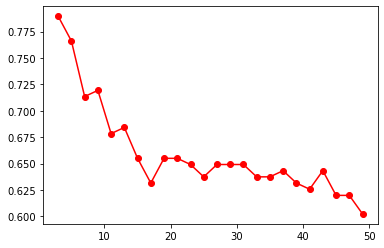

In [35]:
plt.plot(np.arange(3,50,2),[i[0] for i in acc],"ro-")


# test accuracy plot


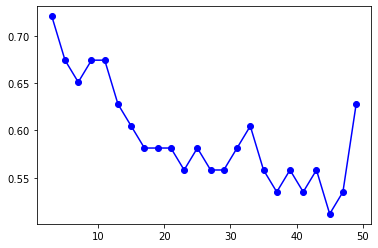

In [36]:
plt.plot(np.arange(3,50,2),[i[1] for i in acc],"bo-")

Problem Statement: -
A National Park, in India is dealing with a problem of segregation of its species based on the different attributes it has so that they can have cluster of species together rather than  manually classify them, they have taken painstakingly  collected the data and would like you to help them out with a classification model for their  business objective to be achieved, by using KNN Algorithm  classify the different species and draft your inferences in the documentation.


# importing libraries

In [37]:
import pandas as pd
import numpy as np
import networkx as nx 
import matplotlib.pyplot as plt


In [38]:
zoos = pd.read_csv(r"F:\360\knn\Zoo.csv")
zoo = zoos.iloc[:, 1:]
zoo


,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [39]:
zoos['legs'] = np.where(zoos['legs'] == '0', ' zero ', zoos['legs'])
zoos['legs'] = np.where(zoos['legs'] == '1', ' one ', zoos['legs'])
zoos['legs'] = np.where(zoos['legs'] == '2', ' two ', zoos['legs'])
zoos['legs'] = np.where(zoos['legs'] == '3', ' three ', zoos['legs'])
zoos['legs'] = np.where(zoos['legs'] == '4', ' four ', zoos['legs'])
zoos['legs'] = np.where(zoos['legs'] == '5', ' five ', zoos['legs'])
zoos['legs'] = np.where(zoos['legs'] == '6', ' six ', zoos['legs'])
zoos['legs'] = np.where(zoos['legs'] == '8', ' eight ', zoos['legs'])


# Normalization function 

In [40]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

# Normalized data frame (considering the numerical part of data)
zoo_n = norm_func(zoo.iloc[:, :])
zoo_n.describe()



,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,0.355198,0.742574,0.128713,0.435644,0.305281
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,0.254173,0.439397,0.336552,0.498314,0.350452
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.500000,1.000000,0.000000,0.000000,0.166667
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.500000,1.000000,0.000000,1.000000,0.500000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [41]:
X = np.array(zoo_n.iloc[:,:]) # Predictors 
Y = np.array(zoo['legs']) # Target 
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 21)
knn.fit(X_train, Y_train)
pred = knn.predict(X_test)
pred

array([4, 4, 4, 4, 6, 4, 0, 4, 2, 4, 4, 2, 6, 2, 4, 4, 4, 4, 2, 0, 6],
      dtype=int64)

# Evaluating the model

In [42]:
from sklearn.metrics import accuracy_score
print(accuracy_score(Y_test, pred))


0.7142857142857143


In [43]:
pd.crosstab(Y_test, pred, rownames = ['Actual'], colnames= ['Predictions']) 
# error on train data
pred_train = knn.predict(X_train)
print(accuracy_score(Y_train, pred_train))
pd.crosstab(Y_train, pred_train, rownames=['Actual'], colnames = ['Predictions'])


0.775


Predictions,0,2,4,6
Actual,,,,
0,16,0,0,1
2,0,16,5,0
4,5,2,24,0
5,1,0,0,0
6,2,0,0,6
8,0,0,1,1


In [44]:
# creating empty list variable 
acc = []
# running KNN algorithm for 3 to 50 nearest neighbours(odd numbers) and 
# storing the accuracy values
for i in range(3,50,2):
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X_train, Y_train)
    train_acc = np.mean(neigh.predict(X_train) == Y_train)
    test_acc = np.mean(neigh.predict(X_test) == Y_test)
    acc.append([train_acc, test_acc])

acc


[[0.9125, 0.6666666666666666],
 [0.8625, 0.6666666666666666],
 [0.8875, 0.6666666666666666],
 [0.85, 0.6666666666666666],
 [0.825, 0.7142857142857143],
 [0.8375, 0.6666666666666666],
 [0.8, 0.7142857142857143],
 [0.775, 0.7142857142857143],
 [0.7875, 0.7142857142857143],
 [0.775, 0.7142857142857143],
 [0.75, 0.6666666666666666],
 [0.7125, 0.6666666666666666],
 [0.7125, 0.6666666666666666],
 [0.7125, 0.6190476190476191],
 [0.7125, 0.6190476190476191],
 [0.7125, 0.6190476190476191],
 [0.7125, 0.6190476190476191],
 [0.7125, 0.6190476190476191],
 [0.7, 0.6190476190476191],
 [0.7, 0.6190476190476191],
 [0.6875, 0.6190476190476191],
 [0.6125, 0.6190476190476191],
 [0.6125, 0.6190476190476191],
 [0.5875, 0.6190476190476191]]

# train accuracy plot 

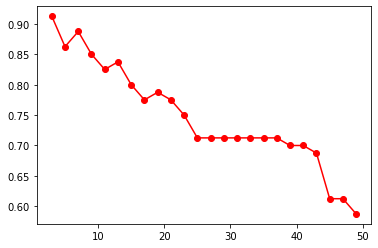

In [45]:
plt.plot(np.arange(3,50,2),[i[0] for i in acc],"ro-")

# test accuracy plot

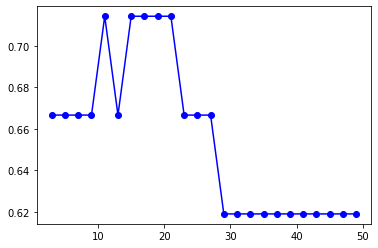

In [46]:
plt.plot(np.arange(3,50,2),[i[1] for i in acc],"bo-")